In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import re
import string
import nltk
from nltk.corpus import stopwords
import emoji
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

In [2]:
folder = r"C:\Users\swarnadeep acharya\Downloads\My data files\twitter"
file1 = os.path.join(folder , "Twitter_Data.csv")

In [3]:
df = pd.read_csv(file1, encoding = 'latin1')

In [4]:
df.head()

,clean_text,category
0,when modi promised âminimum government maxim...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
df.columns = ['text', 'sentiment']

In [6]:
df.head()

,text,sentiment
0,when modi promised âminimum government maxim...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [7]:
df['sentiment'] = df['sentiment'].map({ -1.0 : 'Negative', 0.0: 'Neutral', 1.0: 'Positive'})
df.head()

,text,sentiment
0,when modi promised âminimum government maxim...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


# Data cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       162976 non-null  object
 1   sentiment  162973 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB


In [9]:
df.isnull().sum()

text         4
sentiment    7
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [12]:
df.duplicated().sum()

0

# Data Visualization

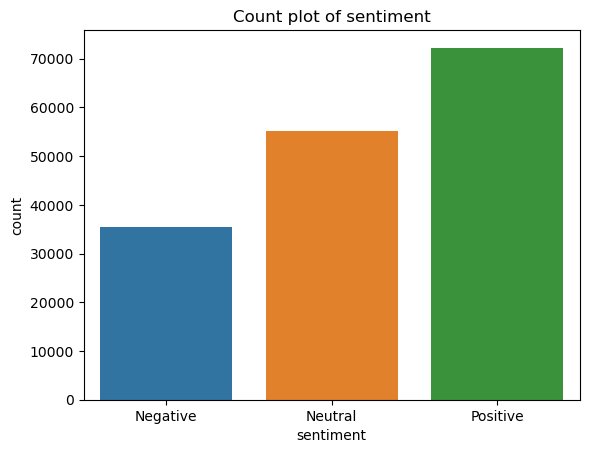

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(x = 'sentiment', data = df)
plt.title('Count plot of sentiment')
plt.show()

<Axes: ylabel='count'>

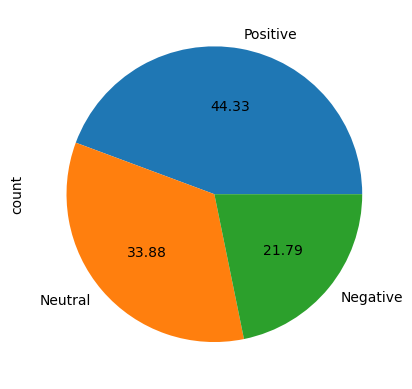

In [19]:
y = df['sentiment']
y.value_counts().plot.pie(autopct = '%.2f')

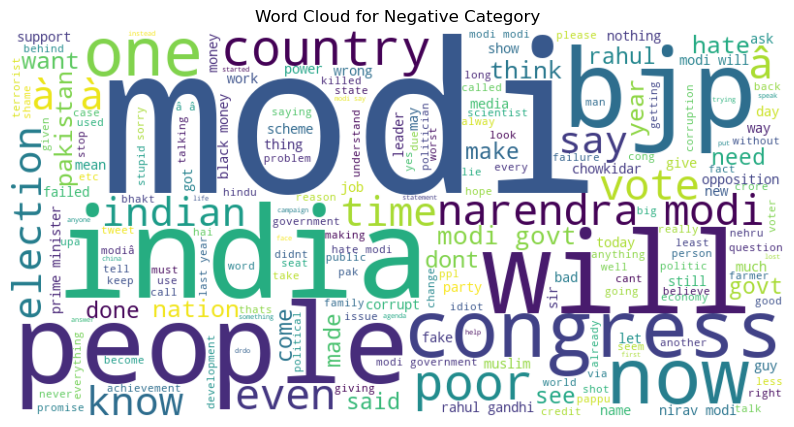

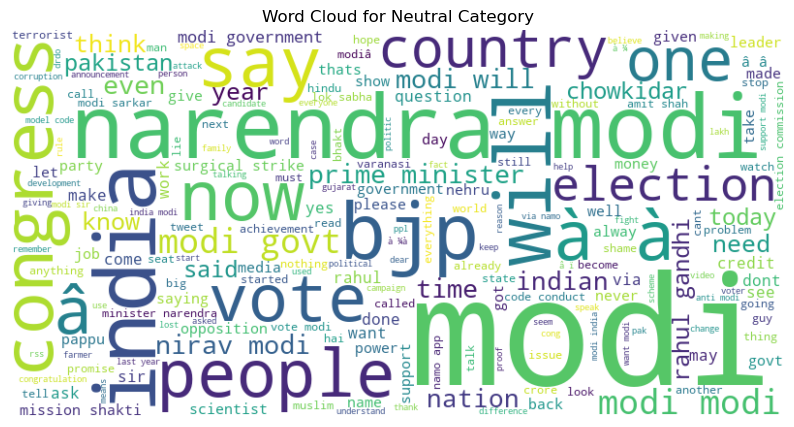

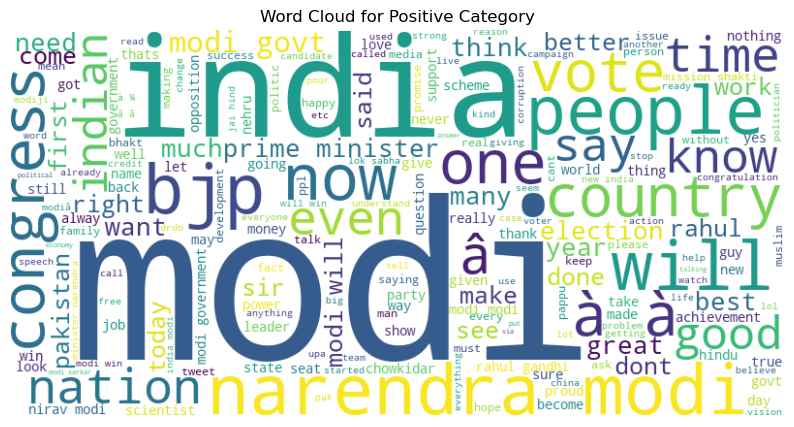

In [20]:

from wordcloud import WordCloud
categories = df['sentiment'].unique()
for category in categories:
    text = " ".join(df[df['sentiment'] == category]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category} Category')
    plt.axis("off")
    plt.show()

# Text Preprocesssing

In [21]:
#giving slangs their appropriate meaning
text = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
QPSA? Que Pasa?
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
TFW=That Feeling When
MFW=My Face When
MRW=My Reaction When
IFYP=I Feel Your Pain
TNTL=Trying Not To Laugh
JK=Just Kidding
IDC=I Don't Care
ILY=I Love You
IMU=I Miss You
ADIH=Another Day In Hell
ZZZ=Sleeping, Bored, Tired
WYWH=Wish You Were Here
TIME=Tears In My Eyes
BAE=Before Anyone Else
FIMH=Forever In My Heart
BSAAW=Big Smile And A Wink
BWL=Bursting With Laughter
LMAO=Laughing My A** Off
BFF=Best Friends Forever
CSL=Can't Stop Laughing
"""
def text_to_dict(text):
    dictionary = {}
    lines = text.strip().split('\n')  
    for line in lines:
        if '=' in line:
            key, value = line.split('=', 1)  
            dictionary[key.strip()] = value.strip()  
    return dictionary


In [22]:

result_dict = text_to_dict(text)
print(result_dict)


{'AFAIK': 'As Far As I Know', 'AFK': 'Away From Keyboard', 'ASAP': 'As Soon As Possible', 'ATK': 'At The Keyboard', 'ATM': 'At The Moment', 'A3': 'Anytime, Anywhere, Anyplace', 'BAK': 'Back At Keyboard', 'BBL': 'Be Back Later', 'BBS': 'Be Back Soon', 'BFN': 'Bye For Now', 'B4N': 'Bye For Now', 'BRB': 'Be Right Back', 'BRT': 'Be Right There', 'BTW': 'By The Way', 'B4': 'Before', 'CU': 'See You', 'CUL8R': 'See You Later', 'CYA': 'See You', 'FAQ': 'Frequently Asked Questions', 'FC': 'Fingers Crossed', 'FWIW': "For What It's Worth", 'FYI': 'For Your Information', 'GAL': 'Get A Life', 'GG': 'Good Game', 'GN': 'Good Night', 'GMTA': 'Great Minds Think Alike', 'GR8': 'Great!', 'G9': 'Genius', 'IC': 'I See', 'ICQ': 'I Seek you (also a chat program)', 'ILU': 'ILU: I Love You', 'IMHO': 'In My Honest/Humble Opinion', 'IMO': 'In My Opinion', 'IOW': 'In Other Words', 'IRL': 'In Real Life', 'KISS': 'Keep It Simple, Stupid', 'LDR': 'Long Distance Relationship', 'LMAO': 'Laughing My A** Off', 'LOL': 'L

In [23]:
def chat_convo(text):
    new_text = []
    for w in text.split():
        if w.upper() in result_dict:
            new_text.append(result_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [24]:
chat_convo("ASAP")

'As Soon As Possible'

In [25]:
def text_preprocess(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', 'URL', text)
    text = re.sub(r'<.*?>', '', text)
    text = ''.join([char for char in text if char in string.printable])
    text = re.sub(r'@\S+', 'USER', text)
    table = str.maketrans('', '', string.punctuation)
    text = text.translate(table)
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])
    return text

In [26]:
df['text']= df["text"].apply(text_preprocess)
df.head()

,text,sentiment
0,modi promised minimum government maximum gover...,Negative
1,talk nonsense continue drama vote modi,Neutral
2,say vote modi welcome bjp told rahul main camp...,Positive
3,asking supporters prefix chowkidar names modi ...,Positive
4,answer among powerful world leader today trump...,Positive


# Train test split

In [27]:
from sklearn.model_selection import train_test_split
X = df['text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
# Checking the mapping
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:")
for class_label, encoded_value in class_mapping.items():
    print(f"{class_label}: {encoded_value}")

Class Mapping:
Negative: 0
Neutral: 1
Positive: 2


In [29]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_words = 10000  
max_sequence_length = 100  
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequence = tokenizer.texts_to_sequences(X_train)
X_test_sequence = tokenizer.texts_to_sequences(X_test)
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train_sequence, maxlen=max_sequence_length)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test_sequence, maxlen=max_sequence_length)

# Model building

In [30]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
embedding_dim = 100
batch_size = 64
epochs = 5

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 1080703 (4.12 MB)
Trainable params: 1080703 (4.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [35]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:

history = model.fit(X_train_padded, y_train,
                      batch_size=batch_size, epochs=epochs,validation_split=0.1)

Epoch 1/5


1834/1834 [==============================] - 167s 89ms/step - loss: 0.3979 - accuracy: 0.8626 - val_loss: 0.2863 - val_accuracy: 0.9174
Epoch 2/5
1834/1834 [==============================] - 166s 91ms/step - loss: 0.2642 - accuracy: 0.9211 - val_loss: 0.2694 - val_accuracy: 0.9217
Epoch 3/5
1834/1834 [==============================] - 170s 93ms/step - loss: 0.2327 - accuracy: 0.9280 - val_loss: 0.2734 - val_accuracy: 0.9202
Epoch 4/5
1834/1834 [==============================] - 171s 93ms/step - loss: 0.1989 - accuracy: 0.9354 - val_loss: 0.2893 - val_accuracy: 0.9189
Epoch 5/5
1834/1834 [==============================] - 170s 93ms/step - loss: 0.1633 - accuracy: 0.9451 - val_loss: 0.3260 - val_accuracy: 0.9133


In [37]:
loss , accuracy = model.evaluate(X_test_padded, y_test)
print('loss:',loss)
print('accuracy',accuracy)

1019/1019 [==============================] - 26s 26ms/step - loss: 0.3324 - accuracy: 0.9113
loss: 0.3323790431022644
accuracy 0.9113026857376099


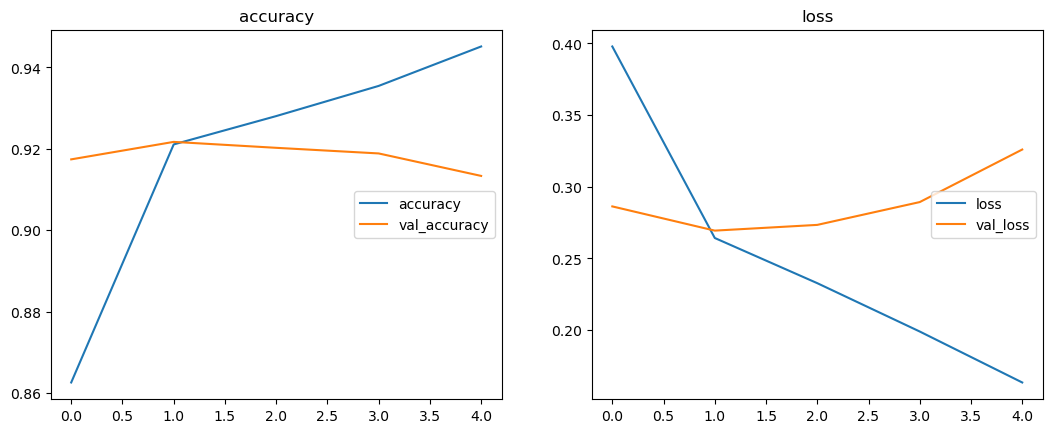

In [43]:

default_size = plt.rcParams['figure.figsize']
fig = plt.figure(figsize=[default_size[0] * 2, default_size[1]])
fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='right')

fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['loss', 'val_loss'], loc='right')

plt.show()

## Saving the model

In [83]:
import pickle

In [84]:
filename = 'LSTM_sentiment.pkl'
pickle.dump(model, open(filename, 'wb'))


## Loading the model

In [85]:
model = pickle.load(open('LSTM_sentiment.pkl','rb'))

# Predictions

In [109]:

def predict_class(text):
    user_sequences = tokenizer.texts_to_sequences([text])
    text_padded = tf.keras.preprocessing.sequence.pad_sequences(user_sequences, maxlen=100)
    class_mapping={0:'Negative', 1:'Neutral', 2:'Positive'}
    user_predictions = model.predict(text_padded)
    user_pred_classes = np.argmax(user_predictions, axis=1)

    print(f'The sentiment is : {class_mapping[user_pred_classes[0]]}')

In [92]:
predict_class("You are very good!!, keep it up")

1/1 [==============================] - 0s 35ms/step
The sentiment is : Positive


In [90]:
predict_class("He is the best minister i have ever seen")

1/1 [==============================] - 0s 35ms/step
The sentiment is : Positive


In [99]:
predict_class("Guide Dogs will be our charity of choice globally, and they rely on donations to continue life-changing work for the blind…")

1/1 [==============================] - 0s 25ms/step
The sentiment is : Neutral


In [101]:
predict_class(" WTF @elonmusk ?!?! I told you that in confidence! You can build a rocket but can’t keep a damn secret?!?!")

1/1 [==============================] - 0s 28ms/step
The sentiment is : Negative


In [103]:
predict_class('@BillyM2k 🤣🤣')

1/1 [==============================] - 0s 33ms/step
The sentiment is : Neutral


In [107]:
predict_class('Can we go back to using #hashtags all the time for no reason like people did in 2009? Its so #nostalgic when I see #tweets like this lol')

1/1 [==============================] - 0s 28ms/step
The sentiment is : Neutral
